1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

##Import packages

In [1]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
#Link to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
PATH = "/content/drive/MyDrive/Intro ML/Week 2/heart.csv" # Path to your file

#Read data
df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Data Analysis

In [4]:
# Data analysis
# Todo: analyze your data here

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

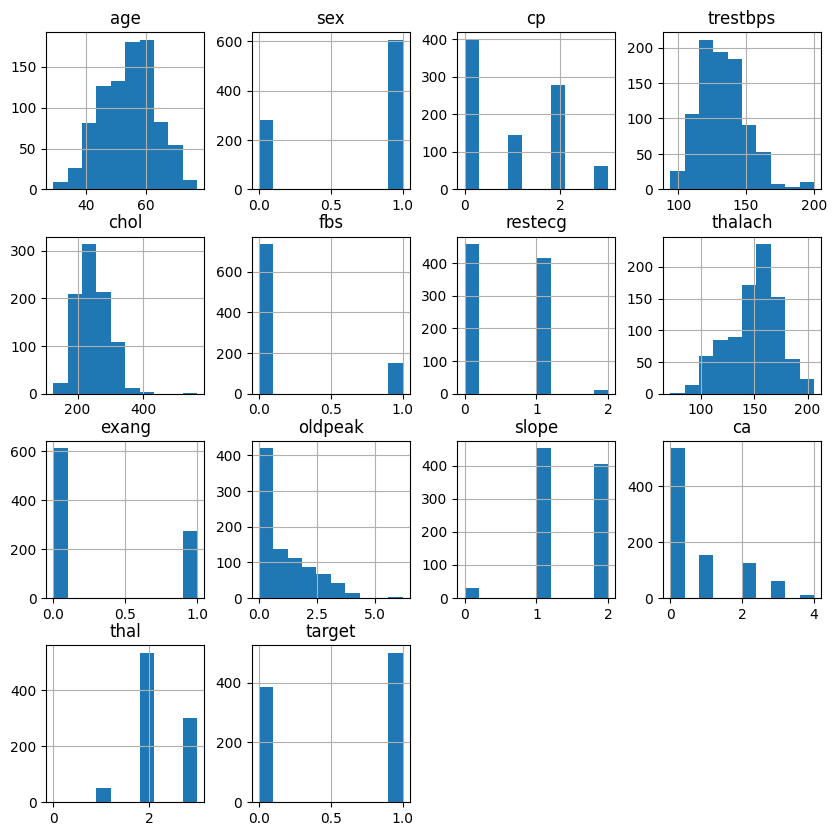

In [7]:
df.hist(figsize=(10, 10))

<Axes: xlabel='age', ylabel='count'>

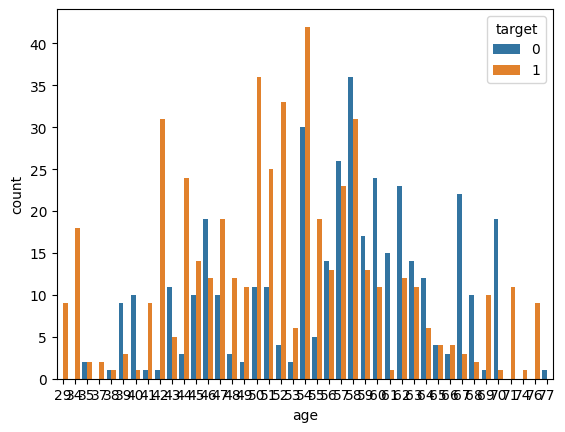

In [8]:
sns.countplot(data=df, x='age', hue='target')

In [9]:
#Count number of target in dataset
df['target'].value_counts()

target
1    500
0    386
Name: count, dtype: int64

Dataset is imbalance for 2 classes

## Preprocessing

In [10]:
#Check null value in data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#Check duplicate value in data
df.duplicated().sum()

0

In [12]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data

    df = df
    return df

In [13]:
df = preprocessing_data(df.copy())

<Axes: >

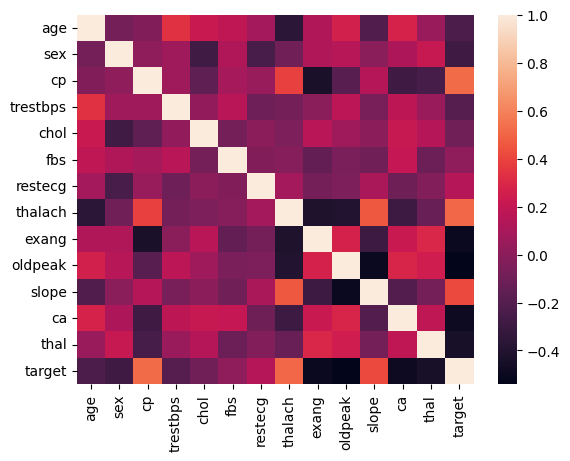

In [14]:
sns.heatmap(df.corr())

## Feature Engineering

In [15]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('target', axis=1, inplace=False)
    y = df['target']
    return X, y

X, y = prepare_X_y(df)

In [16]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    scaler = StandardScaler()
    standard = scaler.fit_transform(df)
    standard_df = pd.DataFrame(standard)

    return standard_df



           0         1         2         3         4         5         6   \
0   -0.877950  0.679740 -0.982109 -0.721358  0.031839 -0.449634 -0.941321   
1    1.862936 -1.471151 -0.005511  1.659875  1.155116 -0.449634  0.958475   
2    1.862936 -1.471151 -0.005511  1.659875  1.176310 -0.449634  0.958475   
3    1.862936 -1.471151 -0.005511  1.659875  1.197504 -0.449634  0.958475   
4    1.862936 -1.471151 -0.005511  1.659875  1.218698 -0.449634  0.958475   
..        ...       ...       ...       ...       ...       ...       ...   
881  1.534030 -1.471151  0.971086 -0.721358 -0.773530 -0.449634 -0.941321   
882 -1.097220 -1.471151  0.971086 -1.435727 -2.257105 -0.449634  0.958475   
883 -0.220137  0.679740 -0.982109 -0.245111  0.159002 -0.449634  0.958475   
884  0.547311  0.679740  1.947684  1.659875  0.540493 -0.449634 -0.941321   
885 -0.000866  0.679740 -0.982109 -0.721358 -1.260990 -0.449634  0.958475   

           7         8         9         10        11        12        13  

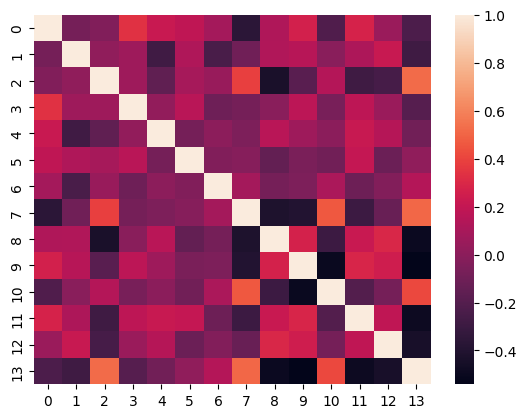

In [17]:
#Apply normalization to the data set
standard_df = apply_feature_engineering(df)

# Show heatmap after normalized data
sns.heatmap(standard_df.corr())
print(standard_df)

# Apply machine learning model

## Train-test split

In [18]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [19]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#Build model function
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Define the pipeline with StandardScaler and LogisticRegression
    model = make_pipeline(StandardScaler(), LogisticRegression())

    # Fit the model to the training data
    model.fit(X, y)

    return model


def calculate_performance(testY, predY):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return: main score (F1-score in this case)
    """

    # Calculate precision, recall, accuracy, and F1-score
    print("Accuracy: ", accuracy_score(testY, predY))
    print("Precision: ", precision_score(testY , predY))
    print("Recall: ", recall_score(testY , testY ))
    print("F1: ", f1_score(testY , predY))
    print("Confusion matrix: \n", confusion_matrix(testY , predY ))
    print("Classification_report: \n", classification_report(testY, predY))
    main_score = f1_score(testY , predY)
    return main_score



In [20]:
#Buil model
model = build_model(trainX, trainY)

# Save predictions
predY = model.predict(testX)


In [21]:
calculate_performance(testY, predY)

Accuracy:  0.9285714285714286
Precision:  0.91875
Recall:  1.0
F1:  0.939297124600639
Confusion matrix: 
 [[100  13]
 [  6 147]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       113
           1       0.92      0.96      0.94       153

    accuracy                           0.93       266
   macro avg       0.93      0.92      0.93       266
weighted avg       0.93      0.93      0.93       266



0.939297124600639

In [28]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion:  I choose F1 because the F1 Score is the harmonic mean of precision and recall, providing a single metric to assess a model’s performance in terms of both false positives and false negatives." \


In [29]:
get_conclusion()

'7. Other conclusion:  I choose F1 because the F1 Score is the harmonic mean of precision and recall, providing a single metric to assess a model’s performance in terms of both false positives and false negatives.'